# 데이터 불러오기

In [3]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding_p/faces1_copy/faces'
file_list = os.listdir(dir_path)

# matplotlib으로 이미지 확인하기

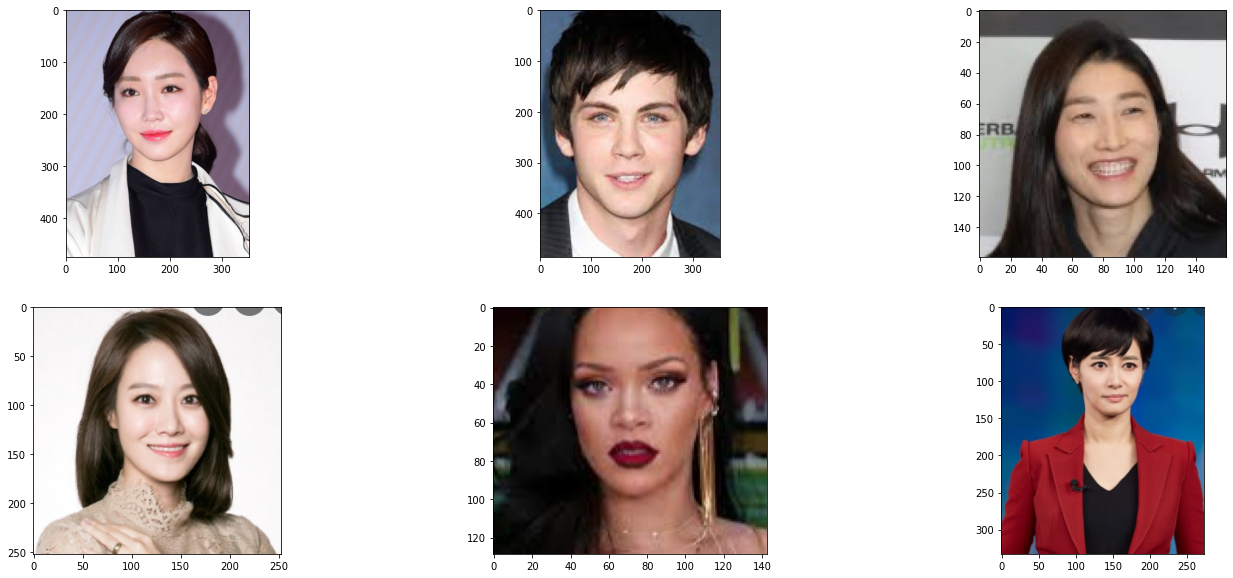

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

# 얼굴 영역 자르기

[(56, 195, 146, 106)]


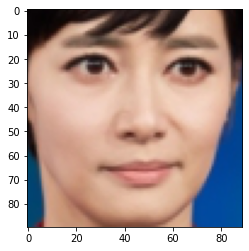

In [6]:
import face_recognition
%matplotlib inline

image_path = os.getenv('HOME')+'/aiffel/face_embedding_p/faces1_copy/faces/김주하.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# 얼굴 영역 자르는 함수 만들기

In [7]:
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

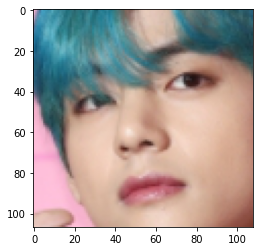

In [8]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding_p/faces1_copy/faces/뷔.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

# 얼굴 임베딩 추출하기

특정 얼굴 사진의 임베딩 벡터 추출해 보기

In [10]:
image_file = os.path.join(dir_path, '김태희.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07391988,  0.01908385,  0.03632184, -0.10329694, -0.10187323,
         0.00939978, -0.11048494, -0.12410452,  0.0945152 , -0.19143993,
         0.17199728, -0.11827347, -0.16260448,  0.03933571, -0.02613873,
         0.15867056, -0.2267351 , -0.20720614,  0.00927801,  0.01008953,
         0.04436306,  0.01323538, -0.04897067,  0.09039544, -0.13959952,
        -0.3344948 , -0.13723548, -0.05085177,  0.0324813 , -0.09059428,
        -0.0680223 ,  0.05392747, -0.20602114,  0.02699153,  0.0365478 ,
         0.1900982 ,  0.01659144, -0.11153414,  0.14404665,  0.00428942,
        -0.23832722,  0.0846185 ,  0.09179074,  0.2086854 ,  0.16110662,
         0.01343976, -0.03559262, -0.14776221,  0.10148227, -0.14701253,
         0.06783292,  0.13996895,  0.11622366,  0.10312221,  0.02336741,
        -0.1180738 ,  0.03943894,  0.1253102 , -0.14199568,  0.01644073,
         0.06811208, -0.01686639,  0.10136044, -0.12284137,  0.20289178,
         0.10382047, -0.05309838, -0.21874565,  0.1

# 임베딩 벡터 추출하는 함수만들기

In [11]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

임베딩 벡터 추출 함수가 잘 만들어졌는지 확인해 보기

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['신세경']

array([-0.13515292,  0.09406718,  0.03401132, -0.10505083, -0.08606835,
        0.02903523, -0.04555106, -0.13034868,  0.13550965, -0.16024201,
        0.18582028, -0.16871557, -0.25541267, -0.02295295, -0.04630851,
        0.24006785, -0.20405161, -0.16103055, -0.00887791,  0.03651346,
        0.09388264,  0.05298644, -0.00328978,  0.09860601, -0.11043581,
       -0.38718507, -0.15896574, -0.06563953, -0.07076444, -0.0400799 ,
       -0.00969802,  0.05231805, -0.13978598,  0.01427493,  0.0195887 ,
        0.11441714,  0.0246226 , -0.09488223,  0.11133625, -0.01072359,
       -0.31209108,  0.07352111,  0.1665885 ,  0.24830759,  0.15470062,
        0.01376537, -0.04098119, -0.15438238,  0.09322526, -0.15790251,
        0.01971192,  0.13324499,  0.01717976,  0.05331606,  0.0612104 ,
       -0.07644484,  0.08002459,  0.12368589, -0.17130508, -0.00453757,
        0.14951621, -0.06370459,  0.04557012, -0.12026845,  0.15118083,
        0.08873077, -0.07519148, -0.27002677,  0.11726098, -0.18

# 기준 얼굴 사진끼리의 임베딩 벡터 거리 확인하기(동일인물 식별)

In [13]:
import numpy as np

A = np.array([-0.11303288,  0.02378583,  0.02368188, -0.07395764, -0.13784599,
       -0.01569795, -0.12629361, -0.07562556,  0.15573293, -0.13320109,
        0.11891272, -0.07019664, -0.18113248,  0.01251485, -0.06680927,
        0.15892832, -0.19906618, -0.17558591, -0.00767336,  0.01231743,
        0.06761372,  0.03349463,  0.03235965,  0.03569363, -0.14678861,
       -0.38173142, -0.1415036 , -0.06587928, -0.0108815 , -0.05723261,
       -0.07055345,  0.08709076, -0.14254741,  0.01587095,  0.05061568,
        0.11743277,  0.06610475, -0.06131028,  0.12605798,  0.02119574,
       -0.28860682,  0.03074765,  0.03133911,  0.23977044,  0.24202718,
        0.01865758, -0.02983188, -0.11718678,  0.1359161 , -0.13155095,
        0.0507056 ,  0.15722296,  0.03771668,  0.04528222,  0.03780191,
       -0.1201095 ,  0.05864528,  0.13334946, -0.11705794, -0.07831977,
        0.05774329, -0.0342472 ,  0.03428793, -0.07604898,  0.18983231,
        0.10441057, -0.05828054, -0.28159249,  0.15257262, -0.13127989,
       -0.068062  ,  0.08929916, -0.21039294, -0.12877533, -0.24321491,
       -0.04197867,  0.33628321,  0.08722326, -0.17662713,  0.09549257,
       -0.03913066, -0.00371649,  0.09470735,  0.12169227, -0.0139281 ,
        0.03914869, -0.12105207, -0.01121025,  0.2236308 , -0.04073657,
       -0.04168812,  0.1487208 , -0.01010801,  0.05404587,  0.09342528,
        0.03817231, -0.11980397,  0.05361463, -0.17654791, -0.08097625,
        0.02769568,  0.0277256 , -0.05101928,  0.17045175, -0.13619973,
        0.16065839, -0.03297103,  0.030377  , -0.03341134, -0.00946707,
       -0.02987812, -0.02867107,  0.12924682, -0.21746187,  0.14268871,
        0.12702978,  0.06570701,  0.11378717,  0.06047886,  0.06579852,
       -0.06352531,  0.02005256, -0.24085553,  0.00668207,  0.0820078 ,
       -0.03212779,  0.04529274,  0.02034902])

B = np.array([-0.12195066,  0.12667185,  0.06149235, -0.13176142, -0.16889741,
        -0.0334095 , -0.04065616, -0.07755692,  0.15573201, -0.1256749 ,
         0.14010361, -0.04953814, -0.24330421,  0.13404723, -0.06859059,
         0.19596766, -0.2379784 , -0.11733295, -0.09171903, -0.12561221,
         0.11721966,  0.11184052, -0.05804088,  0.11687896, -0.11264379,
        -0.23998004, -0.04986645, -0.08131897,  0.01340241, -0.12883665,
         0.05603782,  0.05839434, -0.0752853 ,  0.09011093, -0.01050141,
         0.03202268,  0.03400639, -0.09703434,  0.23965918,  0.08199096,
        -0.23894683,  0.05576897,  0.07780357,  0.24071206,  0.22165696,
         0.00987691,  0.05787013, -0.11863115,  0.1767271 , -0.29757211,
        -0.02650165,  0.20468131, -0.00867226,  0.05037711,  0.05195254,
        -0.23593329, -0.01814141,  0.11768062, -0.19395646,  0.08238224,
         0.08775919, -0.09510302, -0.02734462, -0.08790363,  0.20851742,
         0.06239633, -0.15765299, -0.19449316,  0.19562332, -0.19395252,
        -0.16980198,  0.11649573, -0.15905151, -0.16274643, -0.25972623,
         0.01628896,  0.38865349,  0.17824996, -0.13634622,  0.10028655,
        -0.09592441, -0.05165262,  0.01120785,  0.18866971, -0.00289459,
        -0.02065795, -0.08749925,  0.03035568,  0.20639193, -0.00988924,
         0.01387882,  0.32382667,  0.06990153,  0.03921803, -0.06885175,
         0.08955781, -0.18674204, -0.05912262, -0.08926159, -0.10345875,
         0.00345211,  0.02080627, -0.00394784,  0.16804382, -0.21693182,
         0.24432626, -0.11526152, -0.01842758, -0.14404854, -0.00146706,
         0.00452343,  0.06491517,  0.19001828, -0.19546466,  0.09917083,
         0.21226886,  0.06342662,  0.09555427,  0.07335378,  0.04282221,
         0.0175325 , -0.0258888 , -0.2446122 , -0.05274921,  0.02579764,
        -0.07545777,  0.0021649 ,  0.07069263])

C = np.array([-1.72107399e-01,  1.25644043e-01,  9.90867838e-02, -1.41377449e-01,
        -1.50206015e-01, -3.23539265e-02, -5.61437830e-02, -8.26327354e-02,
         2.02345178e-01, -1.61711648e-01,  1.81482643e-01, -5.54119702e-03,
        -2.06698596e-01,  1.11110725e-01, -1.17225684e-01,  2.12099820e-01,
        -2.66097546e-01, -1.08531989e-01, -6.77150786e-02, -1.00458555e-01,
         1.08812138e-01,  7.34749809e-02, -9.59135666e-02,  1.00218669e-01,
        -1.00645795e-01, -2.31562749e-01, -1.02791429e-01, -6.28825128e-02,
         5.36638461e-02, -9.38384607e-02,  5.81547916e-02,  2.09693648e-02,
        -9.15394872e-02,  5.01346216e-02, -3.50166708e-02,  4.47634645e-02,
         2.08705012e-02, -1.13377146e-01,  2.04041570e-01,  5.02318852e-02,
        -2.08270177e-01,  5.40281199e-02,  6.91856220e-02,  2.48455033e-01,
         2.14224562e-01,  2.72817258e-02,  6.20897077e-02, -1.54636234e-01,
         2.14239553e-01, -2.69548535e-01, -5.41302934e-02,  1.93305746e-01,
         3.20879258e-02,  6.85304105e-02,  5.58158979e-02, -2.05072820e-01,
         2.14983094e-02,  1.00129098e-01, -2.14097396e-01,  6.34904057e-02,
         1.07958682e-01, -9.06434432e-02, -4.35536169e-02, -1.22366145e-01,
         1.89103156e-01,  6.96833059e-02, -1.67913675e-01, -2.11983547e-01,
         2.49544069e-01, -1.83537841e-01, -1.17665060e-01,  1.13717750e-01,
        -1.50539294e-01, -1.68164462e-01, -2.60210931e-01,  3.32892649e-02,
         4.08169925e-01,  2.03079045e-01, -9.03486237e-02,  1.00931123e-01,
        -8.15430209e-02, -4.82204892e-02, -9.45348293e-03,  1.98513806e-01,
        -8.98158178e-03, -3.22235674e-02, -6.80659339e-02,  3.71269695e-02,
         1.74096897e-01, -1.94601528e-03,  4.64971438e-02,  2.73802817e-01,
         7.22291470e-02,  2.58534830e-02, -8.21770281e-02,  1.05454676e-01,
        -2.02828258e-01, -1.07997740e-02, -6.97676241e-02, -3.65010537e-02,
         7.27790594e-03,  4.03282493e-02,  2.86377408e-02,  1.37642637e-01,
        -1.40746444e-01,  2.60369271e-01, -1.10329114e-01,  1.58890430e-03,
        -1.27528444e-01, -1.73887536e-02, -1.73648633e-02,  6.25473931e-02,
         1.83376059e-01, -1.87921226e-01,  1.13821708e-01,  1.76235259e-01,
         3.31808254e-02,  9.95835289e-02,  8.18399340e-02,  1.00738756e-01,
        -1.77136362e-02, -2.45483126e-02, -2.40786061e-01, -7.16036782e-02,
         2.79676169e-06, -1.29694477e-01,  2.92881653e-02,  4.40568328e-02])

- B, C는 동일인물의 다른 사진이고, A는 다른 인물 사진이다.
- B와 C의 거리가 A와 B보다 훨씬 가까운 값이 나왔으므로, B와 C는 닮았다고 볼 수 있다. (동일인물임)

In [14]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and B: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and B: 0.7565364979230839
Distance between B and C: 0.3074582370982283


아래 코드는 L2 distance를 구하는 또 다른 방법이다. (함수 사용)

In [15]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('기준인물1', '기준인물2')

0.30745823456856364

# 닮은꼴 얼굴 찾기

In [16]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('기준인물2')

In [17]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('기준인물2')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [18]:
sort_key_func('기준인물1')

0.30745823456856364

In [19]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('기준인물2',
  array([-1.72107399e-01,  1.25644043e-01,  9.90867838e-02, -1.41377449e-01,
         -1.50206015e-01, -3.23539265e-02, -5.61437830e-02, -8.26327354e-02,
          2.02345178e-01, -1.61711648e-01,  1.81482643e-01, -5.54119702e-03,
         -2.06698596e-01,  1.11110725e-01, -1.17225684e-01,  2.12099820e-01,
         -2.66097546e-01, -1.08531989e-01, -6.77150786e-02, -1.00458555e-01,
          1.08812138e-01,  7.34749809e-02, -9.59135666e-02,  1.00218669e-01,
         -1.00645795e-01, -2.31562749e-01, -1.02791429e-01, -6.28825128e-02,
          5.36638461e-02, -9.38384607e-02,  5.81547916e-02,  2.09693648e-02,
         -9.15394872e-02,  5.01346216e-02, -3.50166708e-02,  4.47634645e-02,
          2.08705012e-02, -1.13377146e-01,  2.04041570e-01,  5.02318852e-02,
         -2.08270177e-01,  5.40281199e-02,  6.91856220e-02,  2.48455033e-01,
          2.14224562e-01,  2.72817258e-02,  6.20897077e-02, -1.54636234e-01,
          2.14239553e-01, -2.69548535e-01, -5.41302934e-02,  1.93

순위 1에 본인사진(기준인물2)이 나오지 않도록 코드를 수정했다.

In [20]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i+1][0], sort_key_func(sorted_faces[i+1][0])))

In [21]:
get_nearest_face('기준인물1')

순위 1 : 이름(스칼렛요한슨7), 거리(0.5746388297630376)
순위 2 : 이름(로지데이2), 거리(0.5899705555124997)
순위 3 : 이름(엘리자베스올슨), 거리(0.6749599707761982)
순위 4 : 이름(크리스틴스튜어트), 거리(0.677203599809446)
순위 5 : 이름(배수지), 거리(0.6795182124862645)


In [22]:
get_nearest_face('기준인물2')

순위 1 : 이름(로지데이2), 거리(0.5889868579597801)
순위 2 : 이름(스칼렛요한슨7), 거리(0.6235269156677246)
순위 3 : 이름(스칼렛요한슨9), 거리(0.6557075928566377)
순위 4 : 이름(배수지), 거리(0.664658825681375)
순위 5 : 이름(스칼렛요한슨15), 거리(0.6671099312277399)


# 결과 시각화

처음에는 폰트를 지정해주지 않아도 한글 출력이 되었지만, 재실행시 한글이 표시되지 않아 한글폰트를 지정해주었다.

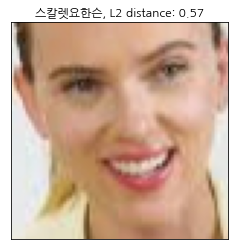

In [44]:
plt.rcParams['font.family'] = 'NanumGothic'

image_path = os.getenv('HOME')+'/aiffel/face_embedding_p/faces1_copy/faces/스칼렛요한슨7.jpg'
cropped_face = get_cropped_face(image_path)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.grid(True)

title1 = plt.title('스칼렛요한슨, L2 distance: 0.57')

plt.imshow(cropped_face)

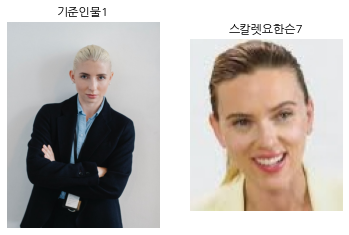

In [47]:
import cv2
os.getcwd() # 디렉터리 위치 리턴
os.chdir(os.getenv('HOME')+'/aiffel/face_embedding_p/faces1_copy/faces')

fig = plt.figure()
rows = 1
cols = 2

img1 = cv2.imread('기준인물1.jpg')
img2 = cv2.imread('스칼렛요한슨7.jpg')
 
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('기준인물1')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('스칼렛요한슨7')
ax2.axis("off")
 
plt.show()


# 회고

1. 0.5 거리 이내의 닮은꼴 연예인을 찾기 위한 시도

1차 실험
- 처음 테스트 시, 총 63개의 연예인 사진을 사용.
- 40개 동양인, 23개 서양인 혹은 동서양 혼혈인 사진 사용.
- 기준 사진(본인 사진 대체)은 여자 유럽인의 사진이므로 Caucasian 인종의 사진이 많아져야 0.5 거리 이내의 사진이 나올 것이라 가정했다.
-----------
2차 실험
- 9개의 백인 여자 배우 사진을 추가하여 다시 테스트.
- 결과는 0.69 거리의 멀리사베노이스트에서 0.62 거리의 엘리자베스올슨 사진으로 바뀌었다.
- 데이터가 부족한 것이 원인이라고 판단되었다.
-----------
3차 실험
- 10개의 유럽, 호주, 미국 백인 여자 배우 사진을 추가하여 다시 테스트.
- 결과는 2차 실험과 같이 0.62 거리의 엘리자베스올슨 사진으로 나왔다.
- 총 40개 동양인, 42개 서양인 혹은 혼혈인 사진으로, 82개 데이터로 테스트한 결과이다.
- 국적과 인종에 관계없이 데이터의 부족이 0.5 거리 이내의 사진이 추출되지 않는 원인이라고 판단 함.
-----------
4차 실험
- 19개의 인종불문 남여 연예인 사진을 추가하여 다시 테스트. (총 101개)
- 결과는 여전히 0.62 거리의 엘리자베스올슨 사진으로 나왔다.
-----------
5차 실험
- 26개의 미드 모던패밀리 출연진 사진을 남녀노소 불문 추가하여 다시 테스트. (총 127개)
- 결과는 여전히 0.62 거리의 엘리자베스올슨 사진으로 나왔다.
- 여전히 데이터 부족.
-----------
6차 실험
- 0.62~0.71 거리의 사진을 직접 살펴보고 얼굴의 공통된 특징을 확인했다.
- 최대한 비슷한 특징을 가지고 있는 연예인의 사진을 추가하여 다시 테스트. (총 142개)
- 결과는 여전히 0.62 거리의 엘리자베스올슨 사진으로 나왔다.
- 개선된 결과도 있는데, 0.62~0.69로 순위에 따른 최대 거리가 0.7점대는 사라지고 모두 0.6점대로 줄어들었다.
-----------
7차 실험
- 6차 실험의 내용 반복하여 데이터 추가.
- 가장 거리가 가깝게 나온 (0.62) 엘리자베스올슨의 다른 사진을 1장, 그외 2장 추가했다. (총145개)
- 결과, 0.62 ~ 0.67로 순위별 거리는 더 줄어들었다.
- 그러나 이전 실험과 마찬가지로 가장 비슷한 사진은 똑같이 나온다.
-----------
8차 실험
- 데이터를 추가하였으나 결과의 변화는 없었다.
- 기준 사진을 두 장 준비하였으니, 다른 사진으로 변경해서 테스트해 보았다.
- 결과는 크리스틴스튜어트가 0.62로 가장 가깝게 나왔다.
- 이로 미루어보아, 기준 사진이 각각 얼굴의 양 측면이 많이 나오게 찍은 사진이라는 것이 문제점인 것 같다.
-----------
9차 실험
- 기준 사진을 정면 사진으로 바꾸어 본다.
- 타 얼굴인식 데이터셋을 보니, 한 인물에 여러 장의 사진을 사용한다는 것을 알 수 있었다.
- 닮은 연예인의 사진을 추가하여 다시 테스트.
- 0.57까지 거리를 줄일 수 있었다.
-----------
10차 실험
- celebA dataset을 kaggle에서 가져왔다.
- 측면, 얼굴 가림 등 가치없는 사진들을 수동으로 제거했다.
- 기존 145개, celebA 추가 5000개
- celebA 데이터를 추가하니 embedding_dict = get_face_embedding_dict(dir_path) 단계에서 IndexError: list index out of range 가 나서 진행이 불가했다.
- 주피터노트북 상에서 폴더에 파일을 추가하니 에러가 나는 것으로 추정된다.
- 에러를 피하기 위해 로컬에서 하나의 폴더에 모든 파일을 넣은 후 주피터노트북에 업로드했다.
- 그래도 똑같은 에러가 난다. 뭐가 원인인지 모르겠다.
- 마지막 방법으로, celebA 데이터만 1000개 올려서 에러 테스트를 해 봤다.
- 똑같은 에러가 난다. 파일에 문제가 있는 것 같다. 시간만 날림.
- L1 distance 사용시 거리 값이 더 커짐.
- 더 이상 실험할 시간이 없어서 여기서 마무리.
-----------
느낀점
- 본인 사진이 온라인에 돌아다니는 걸 원치 않아서 pexels에서 서양인의 사진을 가져다 비교했는데, 혼혈인종이 많아서 동양인보다 닮은꼴 찾기가 힘든 것 같았다. 아마도 한국인 얼굴로 한국 연예인 데이터셋으로 닮은꼴 찾기를 했다면, 결과가 더 쉽게 나오지 않았을까 하는 추측을 해 본다.